In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
 
import warnings
warnings.filterwarnings('ignore')

In [9]:
dataset=pd.read_csv(r'D:\happiness_score_dataset.csv')
dataset
dataset.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [37]:
dataset.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [38]:
dataset.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [39]:
dataset.shape

(158, 12)

In [52]:
dataset.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [59]:
dataset=dataset.rename({'Happiness Score':'Happiness_Score'})

AttributeError: 'DataFrame' object has no attribute 'Happiness_Score'

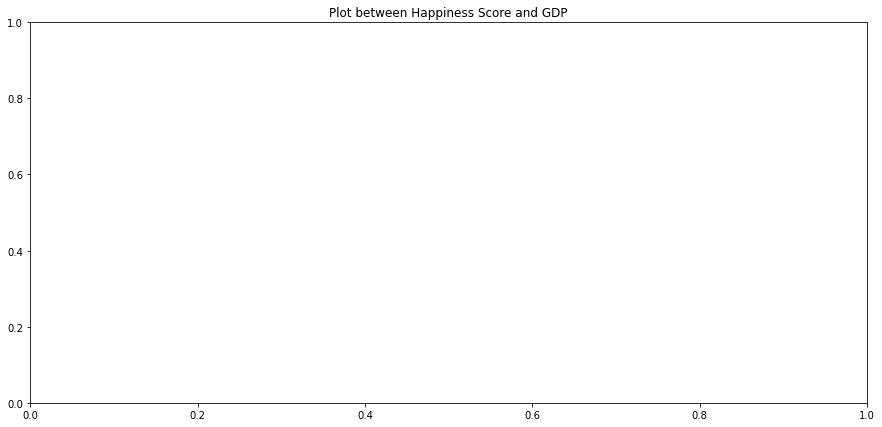

In [60]:
plt.rcParams['figure.figsize']= (15,7)
plt.title('Plot between Happiness Score and GDP')
sns.scatterplot(x=dataset.Happiness_Score,y=dataset.GDP_per_Capita,hue=dataset.Region,s=200);

lpt.legend(loc='upper left',frontsize='10')
plt.xlabel('Happiness Score')
plt.ylabel('GDP per capita')

In [41]:
gdp_region=dataset.groupby('Region')['Economy (GDP per Capita)'].sum()
gdp_region

Region
Australia and New Zealand           2.58376
Central and Eastern Europe         27.33071
Eastern Asia                        6.91068
Latin America and Caribbean        19.28994
Middle East and Northern Africa    21.33947
North America                       2.72080
Southeastern Asia                   7.10149
Southern Asia                       3.92340
Sub-Saharan Africa                 15.21892
Western Europe                     27.27051
Name: Economy (GDP per Capita), dtype: float64

Text(0, 0.5, '')

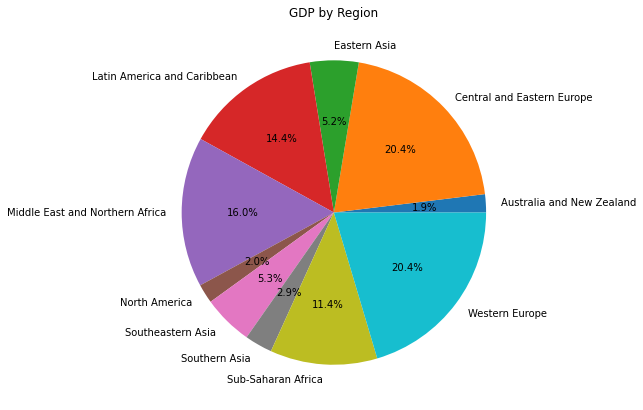

In [42]:
gdp_region.plot.pie(autopct='%1.1f%%')
plt.title('GDP by Region')
plt.ylabel('')

In [43]:
total_country=dataset.groupby('Region')[['Country']].count()
print(total_country)

                                 Country
Region                                  
Australia and New Zealand              2
Central and Eastern Europe            29
Eastern Asia                           6
Latin America and Caribbean           22
Middle East and Northern Africa       20
North America                          2
Southeastern Asia                      9
Southern Asia                          7
Sub-Saharan Africa                    40
Western Europe                        21


<AxesSubplot:>

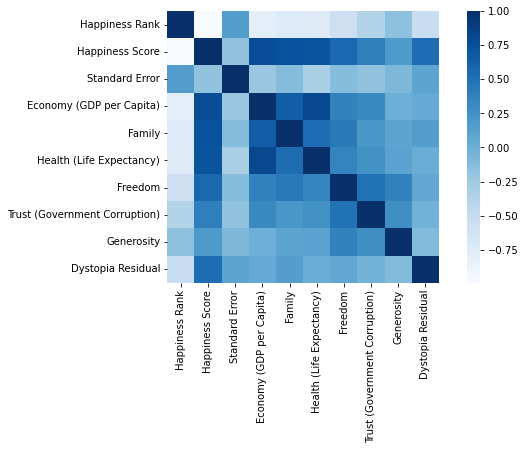

In [44]:
cor=dataset.corr(method='pearson')
f,ax=plt.subplots(figsize=(10,5))
sns.heatmap(cor,mask=np.zeros_like(cor,dtype=np.bool),cmap='Blues',square=True,ax=ax)

In [45]:
corruption=dataset.groupby('Region')[['Trust (Government Corruption)']].mean()
corruption

,Trust (Government Corruption)
Region,
Australia and New Zealand,0.392795
Central and Eastern Europe,0.086674
Eastern Asia,0.127695
Latin America and Caribbean,0.117172
Middle East and Northern Africa,0.181702
North America,0.244235
Southeastern Asia,0.151276
Southern Asia,0.102536
Sub-Saharan Africa,0.123878


In [46]:
plt.rcParams['figure.figsize']=(12,8)
plt.title('Perception of Corruption in various Regions')
plt.xlabel('Regions',fontsize=15)
plt.ylabel('Corruption Index', fontsize=15)
plt.xticks(rotation=30,ha='right')
plt.bar(corruption.index, corruption.Trust (Government Corruption))





SyntaxError: invalid syntax (3339866039.py, line 6)

In [47]:
top_10=dataset.head(10)
bottom_10=dataset.tail(10)

In [53]:
fig,axes=plt.subplots(1,2,figsize=(16,6))
plt.tight_layout(pad=2)
xlabels= top_10.Country
axes[0].set_title('Top 10 happiest countries Life Expectancy')
axes[0].set_xticklabels(xlabels, rotation=45, ha='right')
sns.barplot(x= top_10.Country, y= top_10.Health (LifeExpectancy), ax= axes[0])
axes[0].set_xlabel('Country Name')
axes[0].set_ylabel('Life expectancy')

xlabels= bottom_10.country_name
axes[1].set_title('Bottom 10 least happy countries Life Expectancy')
axes[1].set_xticklabels(xlabels, rotation=45, ha='right')
sns.barplot(x= bottom_10.Country, y= bottom_10.Health (LifeExpectancy), ax= axes[1])
axes[1].set_xlabel('Country Name') 
axes[1].set_ylabel('Life expectancy')


SyntaxError: invalid syntax (953784032.py, line 6)

In [63]:
plt.rcParams['figure.figsize']=(15,7)
sns.scatterplot(x=dataset.Freedom,y=dataset.Happiness_Score,hue=dataset.Region,s=200)
plt.legend(loc='ipper left',fontsize='12')
plt.xlabel('Freedom')
plt.ylabel('Happiness Score')

AttributeError: 'DataFrame' object has no attribute 'Happiness_Score'